#### Name: Divino Fiel de Bien

# Laboratory Experiment: Pulse Code Modulation (PCM)

**Pulse Code Modulation (PCM)** is a digital scheme for transmitting analog data. It converts an analog signal into digital form so that it can be transmitted through a digital network. The process involves three major steps:

1.  **Sampling**: Converting a continuous-time signal into a discrete-time signal.
2.  **Quantization**: Converting a continuous-amplitude signal into a discrete-amplitude signal.
3.  **Encoding**: Converting the discrete amplitudes into binary codes.

## 1. Sampling

The first step is sampling, where we measure the amplitude of the continuous signal at regular intervals. According to the **Nyquist-Shannon sampling theorem**, the sampling rate ($f_s$) must be at least twice the maximum frequency component ($f_m$) of the signal to avoid aliasing.

$$f_s \ge 2f_m$$

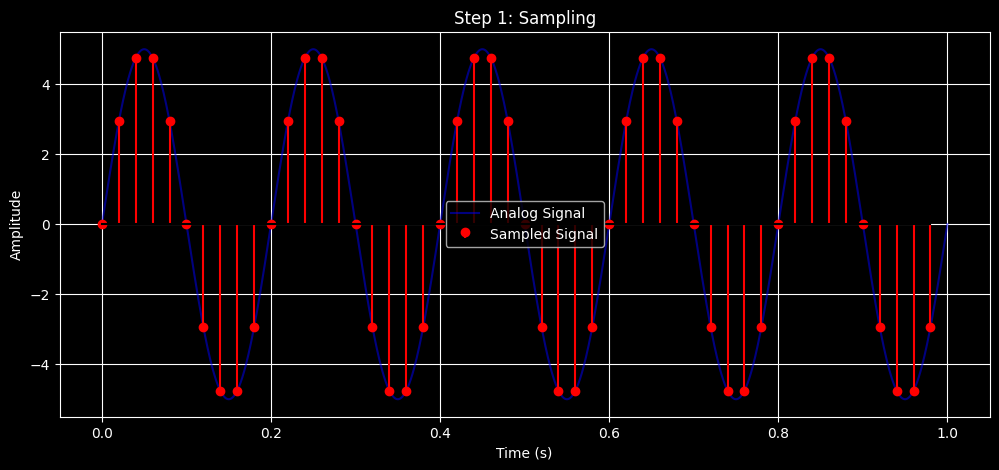

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_m = 5          # Frequency of the analog signal (Hz)
f_s = 50         # Sampling frequency (Hz)
duration = 1     # Duration of the signal (seconds)

# Continuous Signal (simulated with high resolution)
t_continuous = np.linspace(0, duration, 1000)
amplitude = 5
x_continuous = amplitude * np.sin(2 * np.pi * f_m * t_continuous)

# Sampled Signal
t_samples = np.arange(0, duration, 1/f_s)
x_samples = amplitude * np.sin(2 * np.pi * f_m * t_samples)

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(t_continuous, x_continuous, label='Analog Signal', color='blue', alpha=0.5)
ax.stem(t_samples, x_samples, linefmt='r-', markerfmt='ro', basefmt='k', label='Sampled Signal')
ax.set_title("Step 1: Sampling")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.grid(True)
ax.legend()
plt.show()

## 2. Quantization

In quantization, the infinite variety of amplitudes in the sampled signal are mapped to a finite set of discrete levels. 

If we use an **n-bit** quantizer, we have $L = 2^n$ possible levels. The sampled values are rounded to the nearest quantization level.

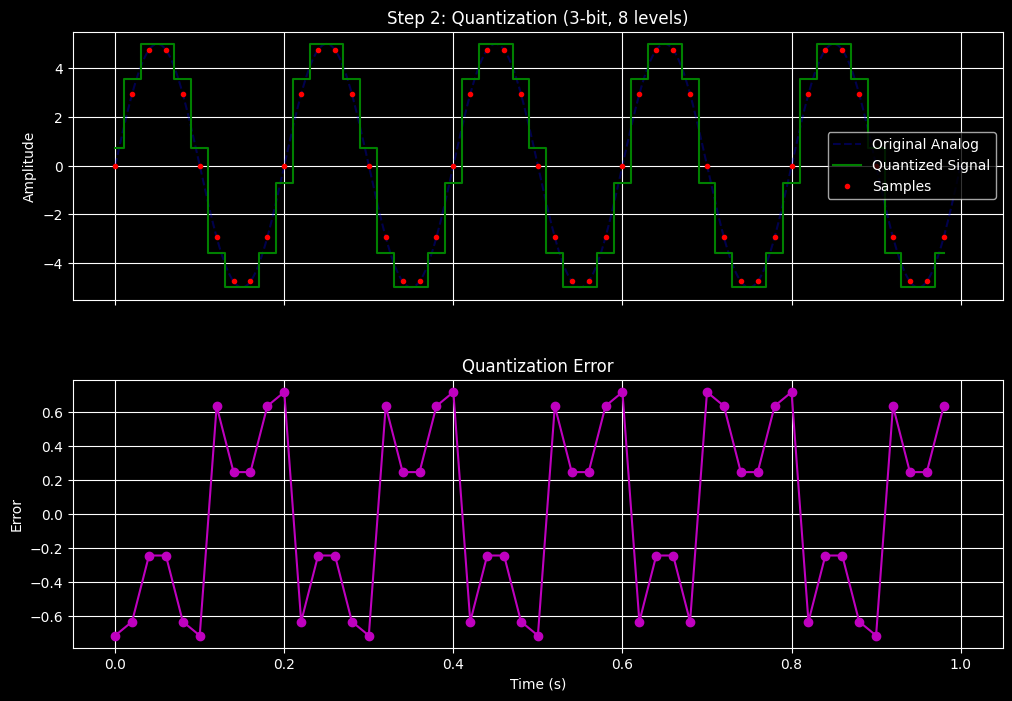

In [2]:
# Quantization Parameters
n_bits = 3                 # Number of bits per sample
L = 2 ** n_bits            # Number of levels (2^3 = 8 levels)
min_val = -amplitude       # Min amplitude
max_val = amplitude        # Max amplitude
step_size = (max_val - min_val) / (L - 1)

# Define the quantization levels
levels = np.linspace(min_val, max_val, L)

# Quantize the sampled signal
indices = np.round((x_samples - min_val) / step_size).astype(int)
indices = np.clip(indices, 0, L - 1) 
x_quantized = levels[indices]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
plt.subplots_adjust(hspace=0.3)

# Plot 1: Analog vs Quantized
ax1.plot(t_continuous, x_continuous, 'b--', alpha=0.3, label='Original Analog')
ax1.step(t_samples, x_quantized, where='mid', color='green', label='Quantized Signal')
ax1.plot(t_samples, x_samples, 'r.', label='Samples')
ax1.set_title(f"Step 2: Quantization ({n_bits}-bit, {L} levels)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)
ax1.legend()

# Plot 2: Quantization Error
quantization_error = x_samples - x_quantized
ax2.plot(t_samples, quantization_error, 'm-o')
ax2.set_title("Quantization Error")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Error")
ax2.grid(True)

plt.show()

## 3. Encoding (Pulse Signal)

The final step is encoding. We convert the quantized level indices (0 to $L-1$) into binary code.

The plot below shows the **Return-to-Zero (RZ)** pulse signal. In this format, a binary '1' is represented by a positive pulse that drops to zero halfway through the bit duration, while a '0' remains at zero. This ensures distinct pulses for adjacent 1s.

First 10 Sample Indices: [4 6 7 7 6 4 1 0 0 1]
First 10 Encoded Values: ['100', '110', '111', '111', '110', '100', '001', '000', '000', '001']


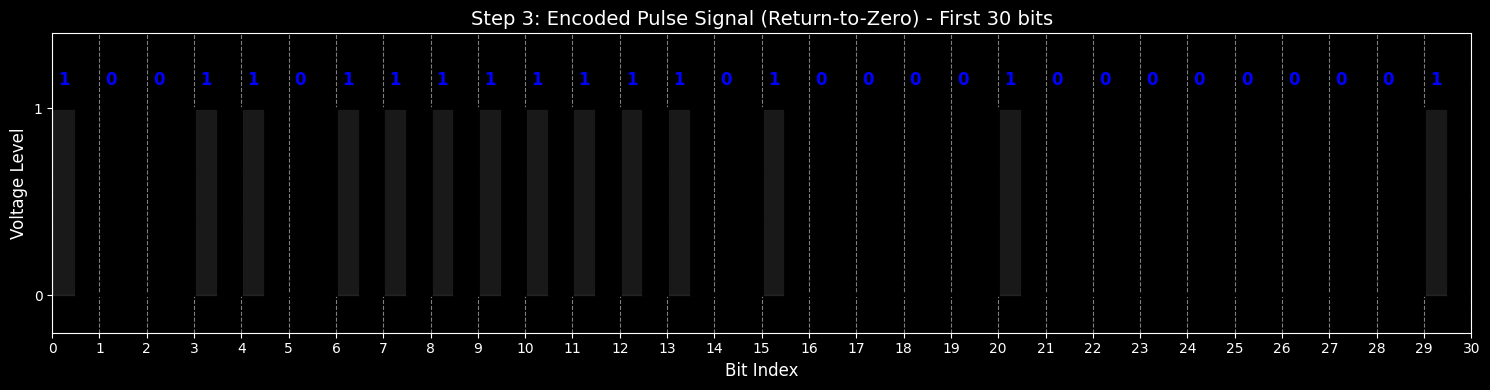

In [3]:
# Encoding Process
binary_codes = []
for index in indices:
    binary_string = np.binary_repr(index, width=n_bits)
    binary_codes.append(binary_string)

print(f"First 10 Sample Indices: {indices[:10]}")
print(f"First 10 Encoded Values: {binary_codes[:10]}")

# --- 2. Create Pulse Signal Data (Return-to-Zero) ---
bit_stream = "".join(binary_codes)
raw_bits = np.array([int(bit) for bit in bit_stream])

num_bits_to_show = 30  # Limit for clarity

# Generate the Return-to-Zero (RZ) waveform
# For every bit, we need 2 points in time to show the 'pulse' shape
pulse_signal = []
time_axis = []

for i, bit in enumerate(raw_bits[:num_bits_to_show]):
    # RZ Logic: High for first half, Low for second half if bit is 1
    if bit == 1:
        pulse_signal.extend([1, 1, 0, 0]) 
    else:
        pulse_signal.extend([0, 0, 0, 0])
    
    # Create sub-intervals for time (0.0, 0.5, 0.5, 1.0)
    time_axis.extend([i, i + 0.5, i + 0.5, i + 1])

# --- 3. Visualization ---
fig, ax = plt.subplots(figsize=(15, 4))

# Plot using standard plot to connect the RZ points
ax.plot(time_axis, pulse_signal, color='black', linewidth=2, label='RZ Pulse Signal')

# Add bit annotations
for i, bit in enumerate(raw_bits[:num_bits_to_show]):
    ax.text(i + 0.25, 1.1, str(bit), 
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

# Styling
ax.set_title(f"Step 3: Encoded Pulse Signal (Return-to-Zero) - First {num_bits_to_show} bits", fontsize=14)
ax.set_xlabel("Bit Index", fontsize=12)
ax.set_ylabel("Voltage Level", fontsize=12)
ax.set_ylim(-0.2, 1.4)
ax.set_xlim(0, num_bits_to_show)
ax.set_yticks([0, 1])

# Grid setup
ax.set_xticks(np.arange(0, num_bits_to_show + 1, 1))
ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)
ax.fill_between(time_axis, pulse_signal, alpha=0.2, color='gray')

plt.tight_layout()
plt.show()

### Summary
The plots above illustrate the complete PCM process:
1. We sampled a continuous sine wave.
2. We quantized the samples to 8 discrete levels.
3. We encoded those levels into a binary stream ready for transmission.